In [1]:
import numpy as np
from imageio import imread
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso 

/var/folders/2g/lgqxddy17rb530lgfvfz7dl40000gn/T/ipykernel_1078/3401098865.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  terrain = imread('../reference_material/oslo.tif')


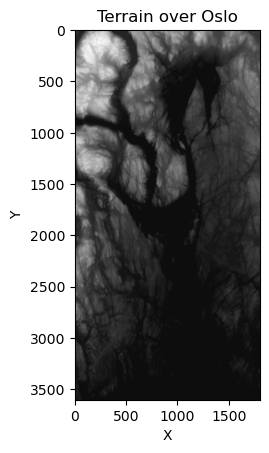

In [2]:
# Load the terrain
terrain = imread('../reference_material/oslo.tif')
# Show the terrain
plt.figure()
plt.title('Terrain over Oslo')
plt.imshow(terrain, cmap='gray')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [ ]:
def create_X(x, y, n):
    """Returns the design matrix X from coordinates x and y with n polynomial degrees."""
    if len(x.shape) > 1:
        x = np.ravel(x)
        y = np.ravel(y)

    N = len(x)
    l = int((n + 1) * (n + 2) / 2)  # Number of elements in beta
    X = np.ones((N, l))

    for i in range(1, n + 1):
        q = int(i * (i + 1) / 2)
        for k in range(i + 1):
            X[:, q + k] = (x**(i - k)) * (y**k)

    return X

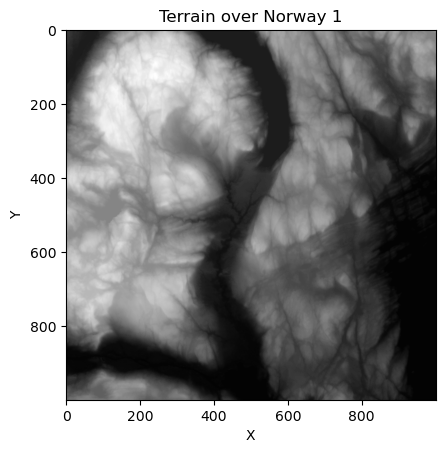

In [35]:
"""Extracting a square piece of the terrain"""

N = 1000
#terrain = terrain[:N,N:]
terrain = terrain[0:N,0:N]
# Creates mesh of image pixels
x = np.linspace(0,1, np.shape(terrain)[0])
y = np.linspace(0,1, np.shape(terrain)[1])
x_mesh, y_mesh = np.meshgrid(x,y)

z = terrain
#X = create_X(x_mesh, y_mesh,5)


# Show the terrain
plt.figure()
plt.title('Terrain over Norway 1')
plt.imshow(terrain, cmap='gray')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

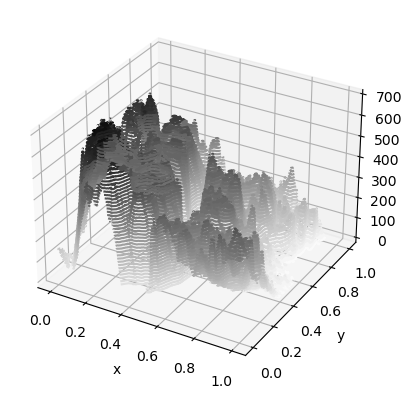

In [36]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(x, y, z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

In [ ]:
z.reshape(-1,1)

# ***testing...***

In [ ]:
# Creates mesh of image pixels
x = np.linspace(0,1, np.shape(terrain)[0])
y = np.linspace(0,1, np.shape(terrain)[1])
x_mesh, y_mesh = np.meshgrid(x,y)
z = terrain
degrees = [6]


# Iterate through all the different polynomial degrees
for degree in degrees:
    # tell the model what degree of polynomial we want
    polynomial_model = PolynomialFeatures(degree)

    # use the package to create a design matrix for a second degree polynomial
    # by converting x to a column vector 
    X = polynomial_model.fit_transform(x_mesh.reshape(-1,1))

    # Split in training and test data up to the given degree
    X_train, X_test, z_train, z_test = train_test_split(X, z.reshape(-1,1), test_size=0.2)


In [ ]:
len(z.reshape(-1,1))

# Implementing task a) to terrain data

In [58]:

def MSE(y_actual, y_model):
    """Returns the mean squared error of the two arrays."""
    y_actual, y_model = y_actual.ravel(), y_model.ravel()  # flatten arrays
    return np.mean((y_actual - y_model)**2)


def R2_score(y_actual, y_model):
    """Returns the R2 score of the two arrays."""
    y_actual, y_model = y_actual.ravel(), y_model.ravel()  # flatten arrays
    return 1 - np.sum((y_actual - y_model)**2) / np.sum((y_actual - np.mean(y_actual))**2)


# PARAMETERS
N = 1000  # number of data points
maxdegree = 35  # max polynomial degree for plotting
noise_std = 1

"""
# Figure output directory
RESULTS_DIR = Path("../results").resolve()
FIGURES_DIR = RESULTS_DIR / "figures"

# Create them if they dont exist
if not RESULTS_DIR.exists():
    RESULTS_DIR.mkdir()

if not FIGURES_DIR.exists():
    FIGURES_DIR.mkdir()
"""
# Creates mesh of image pixels
x = np.linspace(0,1, np.shape(terrain)[0])
y = np.linspace(0,1, np.shape(terrain)[1])
x_mesh, y_mesh = np.meshgrid(x,y)
z = terrain.reshape(-1,1)
x_mesh = x_mesh.reshape(-1,1)

# Initialize scaler
scaler = StandardScaler()

degrees = np.arange(0, maxdegree, 1)
train_mse = np.empty(degrees.shape)
test_mse = np.empty_like(train_mse)
train_r2 = np.empty_like(train_mse)
test_r2 = np.empty_like(train_mse)
beta_arr = []

# Iterate through all the different polynomial degrees
for degree in degrees:
    # tell the model what degree of polynomial we want
    polynomial_model = PolynomialFeatures(degree)

    # use the package to create a design matrix for a second degree polynomial
    # by converting x to a column vector 
    X = polynomial_model.fit_transform(x_mesh)

    # Split in training and test data up to the given degree
    X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.3)


    # Scale data
    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    scaler.fit(z_train)
    z_train_scaled = scaler.transform(z_train)
    z_test_scaled = scaler.transform(z_test)

    # Ordinary least squares linear regression
    beta = np.linalg.pinv(X_train_scaled.T @ X_train_scaled) @ X_train_scaled.T @ z_train_scaled
    z_tilde = X_train_scaled @ beta
    z_predict = X_test_scaled @ beta

    # Store beta value for plotting
    beta_arr.append(beta)

    # Store the MSE and R2 values
    train_mse[degree] = MSE(z_train, z_tilde)
    test_mse[degree] = MSE(z_test, z_predict)
    train_r2[degree] = R2_score(z_train, z_tilde)
    test_r2[degree] = R2_score(z_test, z_predict)

In [59]:
X_train

array([[1.00000000e+00, 4.77477477e-01, 2.27984741e-01, ...,
        5.32712032e-11, 2.54357997e-11, 1.21450215e-11],
       [1.00000000e+00, 5.94594595e-01, 3.53542732e-01, ...,
        5.95759006e-08, 3.54235085e-08, 2.10626267e-08],
       [1.00000000e+00, 8.75875876e-01, 7.67158550e-01, ...,
        1.43933562e-02, 1.26067935e-02, 1.10419863e-02],
       ...,
       [1.00000000e+00, 2.16216216e-01, 4.67494522e-02, ...,
        5.20504410e-22, 1.12541494e-22, 2.43332960e-23],
       [1.00000000e+00, 1.14114114e-01, 1.30220310e-02, ...,
        6.83690617e-31, 7.80187491e-32, 8.90304043e-33],
       [1.00000000e+00, 4.74474474e-01, 2.25126027e-01, ...,
        4.35322696e-11, 2.06549508e-11, 9.80024690e-12]])

In [60]:
X_train_scaled

array([[ 0.        , -0.07782236, -0.35336777, ..., -0.25200283,
        -0.24809772, -0.24436837],
       [ 0.        ,  0.32751621,  0.06733182, ..., -0.25200234,
        -0.24809743, -0.24436819],
       [ 0.        ,  1.30102164,  1.45320942, ..., -0.13412755,
        -0.14342249, -0.15145152],
       ...,
       [ 0.        , -0.98203915, -0.96062194, ..., -0.25200283,
        -0.24809772, -0.24436837],
       [ 0.        , -1.33541123, -1.07363037, ..., -0.25200283,
        -0.24809772, -0.24436837],
       [ 0.        , -0.08821565, -0.36294629, ..., -0.25200283,
        -0.24809772, -0.24436837]])

ValueError: cannot reshape array of size 300000 into shape (300,300)

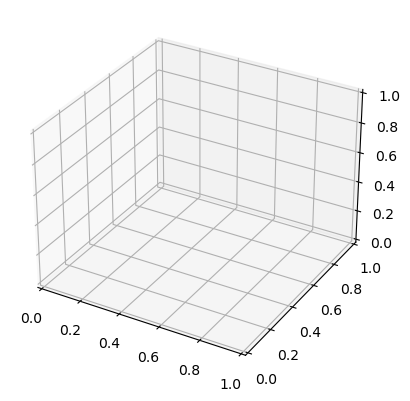

In [42]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(x.reshape(), y, z_predict.reshape(3000,300), 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

Text(0, 0.5, 'MSE')

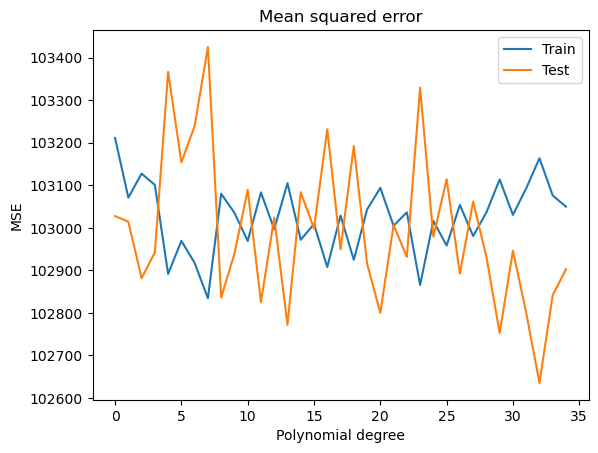

In [56]:
# Plot the MSE as function of poly. degree
plt.figure()
plt.plot(degrees, train_mse, label="Train")
plt.plot(degrees, test_mse, label="Test")
plt.legend()
plt.title("Mean squared error")
plt.xlabel("Polynomial degree")
plt.ylabel("MSE")
#plt.savefig(FIGURES_DIR / "part_a_MSE.png")

Text(0, 0.5, '$R^2$')

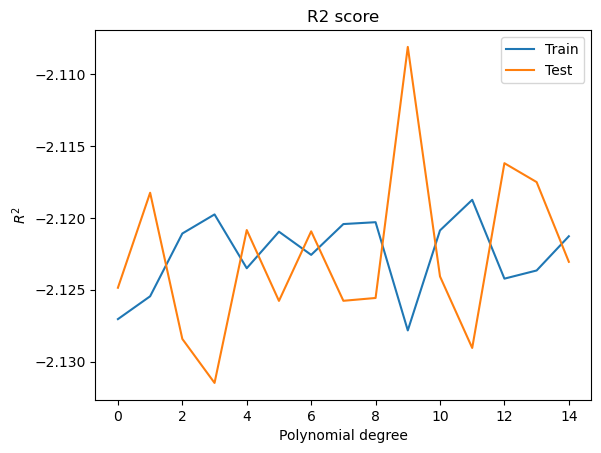

In [52]:
# Plot R2 scores as function of poly. degree 
plt.figure()
plt.plot(degrees, train_r2, label="Train")
plt.plot(degrees, test_r2, label="Test")
plt.legend()
plt.title("R2 score")
plt.xlabel("Polynomial degree")
plt.ylabel("$R^2$")
#plt.savefig(FIGURES_DIR / "part_a_R2.png")

In [ ]:
# Now plot the beta parameters 
plt.figure()
for degree in degrees:
    plt.bar(
            range(beta_arr[degree].size),  # indices
            beta_arr[degree],
            label=f"{degree=}",
    )
plt.legend()
plt.xticks(np.arange(plt.xlim()[1], step=2))
plt.title("Beta parameters")
plt.xlabel("$i$")
plt.ylabel(r"$\beta_i$")
#plt.savefig(FIGURES_DIR / "part_a_beta_params.png")

# Implementing task b) to terrain data

In [22]:
def MSE_Ridge_beta_R2(X_train, X_test, y_train, y_test, lamb):
    """Performs Ridge regression and returns the MSE, R2, and beta values for each lambda value in lamb."""
    mse_test = np.zeros(len(lamb))
    mse_train = np.zeros(len(lamb))
    r2_train = np.zeros(len(lamb))
    r2_test = np.zeros(len(lamb))
    beta = []

    I = np.identity(X_train.shape[1])
    for i in range(len(lamb)):
        # Make ridge regression
        beta_rid = np.linalg.pinv(X_train.T @ X_train + lamb[i] * I) @ X_train.T @ y_train

        # Make prediction
        y_tilde = X_train @ beta_rid
        y_predict = X_test @ beta_rid

        # Compute MSE, beta and R2 values
        mse_train[i] = MSE(y_train, y_tilde)
        mse_test[i] = MSE(y_test, y_predict)
        beta.append(beta_rid)
        r2_train[i] = R2_score(y_train, y_tilde)
        r2_test[i] = R2_score(y_test, y_predict)
    return mse_train, mse_test, beta, r2_train, r2_test


# PARAMETERS
n = 1000  # number of data points
maxdegree = 6  # max polynomial degree for plotting
lmbda_vals = np.linspace(0.0001, 1, 50)
noise_std = 1
"""
# Figure output directory
RESULTS_DIR = Path("../results").resolve()
FIGURES_DIR = RESULTS_DIR / "figures"

# Create them if they dont exist
if not RESULTS_DIR.exists():
    RESULTS_DIR.mkdir()

if not FIGURES_DIR.exists():
    FIGURES_DIR.mkdir()
"""


# Make lists which will contain plot data
degrees = np.arange(0, maxdegree, 1)
mse_train_arr = []
mse_test_arr = []
beta_arr = []
r2_train_arr = []
r2_test_arr = []

# Iterate through all the different polynomial degrees
for degree in degrees:
    # tell the model what degree of polynomial we want
    polynomial_model = PolynomialFeatures(degree)

    # use the package to create a design matrix for a second degree polynomial
    # by converting x to a column vector 
    X = polynomial_model.fit_transform(x_mesh)
    # Split in training and test data
    X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.2)

    # Scale data
    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Perform ridge regression
    mse_train, mse_test, beta, r2_train, r2_test = MSE_Ridge_beta_R2(
            X_train_scaled, X_test_scaled, z_train, z_test, lmbda_vals)
    mse_train_arr.append(mse_train)
    mse_test_arr.append(mse_test)
    beta_arr.append(beta)
    r2_train_arr.append(r2_train)
    r2_test_arr.append(r2_test)

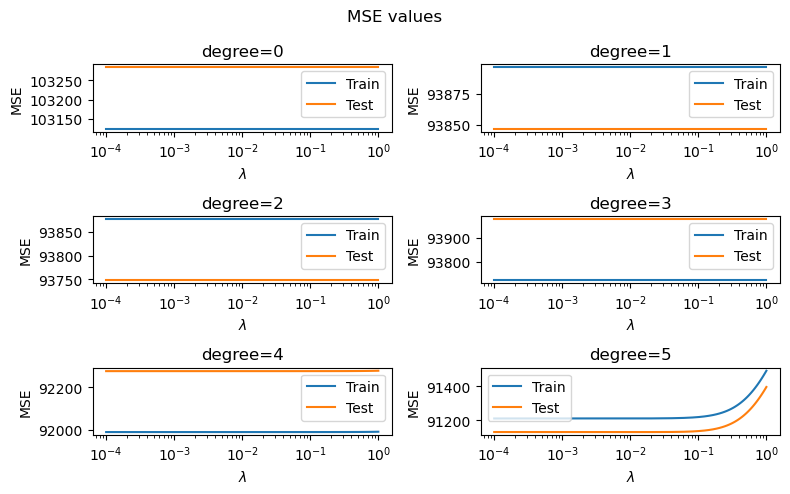

In [23]:
# Plot MSE's
figsize = (8, 5)
fig = plt.figure(figsize=figsize)
fig.suptitle("MSE values")
for degree in degrees:
    plt.subplot(3, 2, degree + 1)
    plt.title(f"{degree=}")
    plt.plot(lmbda_vals, mse_train_arr[degree], label=f"Train")
    plt.plot(lmbda_vals, mse_test_arr[degree], label=f"Test")
    plt.legend()
    plt.xlabel(r"$\lambda$")
    plt.ylabel("MSE")
    plt.xscale("log")
plt.tight_layout()

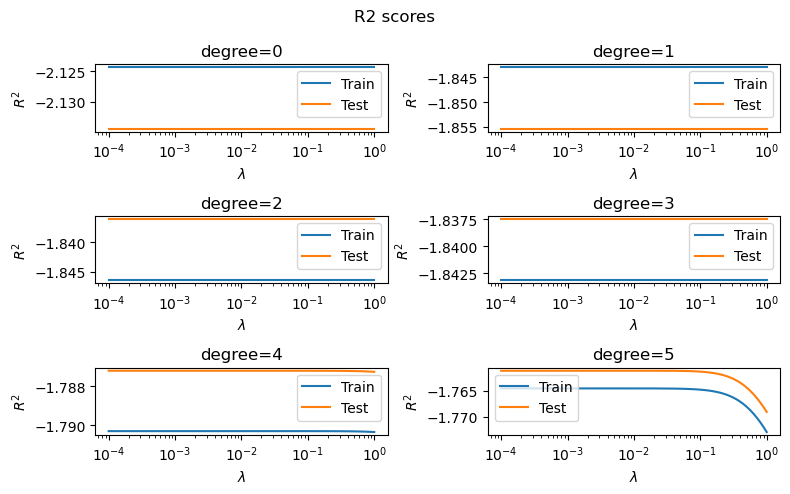

In [24]:
# Plot R2's
fig = plt.figure(figsize=figsize)
fig.suptitle("R2 scores")
for degree in degrees:
    plt.subplot(3, 2, degree + 1)
    plt.title(f"{degree=}")
    plt.plot(lmbda_vals, r2_train_arr[degree], label=f"Train")
    plt.plot(lmbda_vals, r2_test_arr[degree], label=f"Test")
    plt.legend()
    plt.xlabel(r"$\lambda$")
    plt.ylabel("$R^2$")
    plt.xscale("log")
plt.tight_layout()

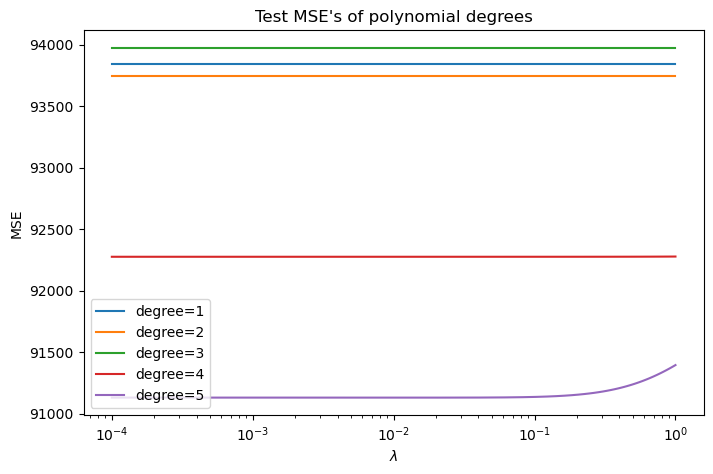

In [25]:
# Plot test MSE's in same figure
plt.figure(figsize=figsize)
plt.title("Test MSE's of polynomial degrees")
for degree in degrees[1:]:
    plt.plot(lmbda_vals, mse_test_arr[degree], label=f"{degree=}")
    plt.legend()
    plt.xlabel(r"$\lambda$")
    plt.ylabel("MSE")
    plt.xscale("log")
#plt.savefig(FIGURES_DIR / "part_b_MSE.png")

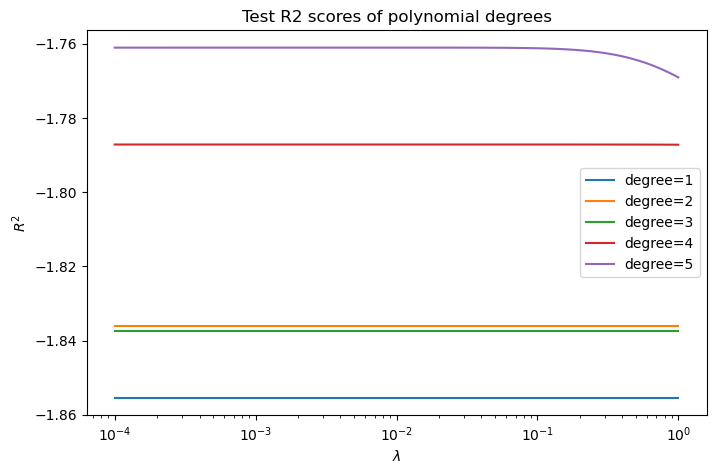

In [26]:
# Plot test R2's in same figure
plt.figure(figsize=figsize)
plt.title("Test R2 scores of polynomial degrees")
for degree in degrees[1:]:
    plt.plot(lmbda_vals, r2_test_arr[degree], label=f"{degree=}")
    plt.legend()
    plt.xlabel(r"$\lambda$")
    plt.ylabel("$R^2$")
    plt.xscale("log")
#plt.savefig(FIGURES_DIR / "part_b_R2.png")

In [27]:
# Print lambda with lowest MSE for each degree
print("OPTIMAL λ-VALS FOR EACH POLY. DEGREE:")
for degree in degrees:
    print(f"{degree=}: λ={lmbda_vals[np.argmin(mse_test_arr[degree])]}")

OPTIMAL λ-VALS FOR EACH POLY. DEGREE:
degree=0: λ=0.0001
degree=1: λ=1.0
degree=2: λ=0.0001
degree=3: λ=0.0001
degree=4: λ=0.0001
degree=5: λ=0.02050612244897959


# Implementing task c) to terrain data